In [36]:
# To enable plotting graphs for the SLE Mini Project
%matplotlib inline 

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


#To break the X and y dataframes into training set and test set, use Sklearn package's data splitting function

from sklearn.model_selection import train_test_split


In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [61]:
#A. Load CSV using Pandas from file
from pandas import read_csv
#loan_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

loan_df=pd.read_csv("test.csv") 

#names of columns
names= ['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account',
'CD Account','Online CreditCard']

#Print first 20 records
loan_recs = loan_df.head(20)
print(loan_recs)

    ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  Personal Loan  \
0    1   25           1      49     91107       4    1.6          1         0              0   
1    2   45          19      34     90089       3    1.5          1         0              0   
2    3   39          15      11     94720       1    1.0          1         0              0   
3    4   35           9     100     94112       1    2.7          2         0              0   
4    5   35           8      45     91330       4    1.0          2         0              0   
5    6   37          13      29     92121       4    0.4          2       155              0   
6    7   53          27      72     91711       2    1.5          2         0              0   
7    8   50          24      22     93943       1    0.3          3         0              0   
8    9   35          10      81     90089       3    0.6          2       104              0   
9   10   34           9     180     9302

In [39]:
#loan_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [44]:
#B. #Details of rows and columns
print(loan_df.shape)

(5000, 14)


In [45]:

#C. Data type of attributes
print(loan_df.dtypes)

#D. Statistical Summary 
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
description = loan_df.describe()
print(description)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object
            ID       Age  Experience    Income   ZIP Code    Family     CCAvg  Education  \
count  5000.00  5000.000    5000.000  5000.000   5000.000  5000.000  5000.000   5000.000   
mean   2500.50    45.338      20.105    73.774  93152.503     2.396     1.938      1.881   
std    1443.52    11.463      11.468    46.034   2121.852     1.148     1.748      0.840   
min       1.00    23.000      -3.000     8.000   9307.000     1.000     0.000      1.000   
25%    1250.75    35.000      10.000    39.000  91911.000     1.000     0.700      1.000   
50%    2500.50

In [46]:
#E. univariate analysis

univariate_skew = loan_df.skew()
print(univariate_skew)

ID                     0.000
Age                   -0.029
Experience            -0.026
Income                 0.841
ZIP Code             -12.500
Family                 0.155
CCAvg                  1.598
Education              0.227
Mortgage               2.104
Personal Loan          2.744
Securities Account     2.588
CD Account             3.692
Online                -0.395
CreditCard             0.905
dtype: float64


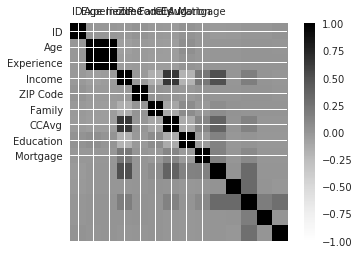

In [62]:
#F. #Multivariate plot
from matplotlib import pyplot
import numpy

correlations = loan_df.corr()

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


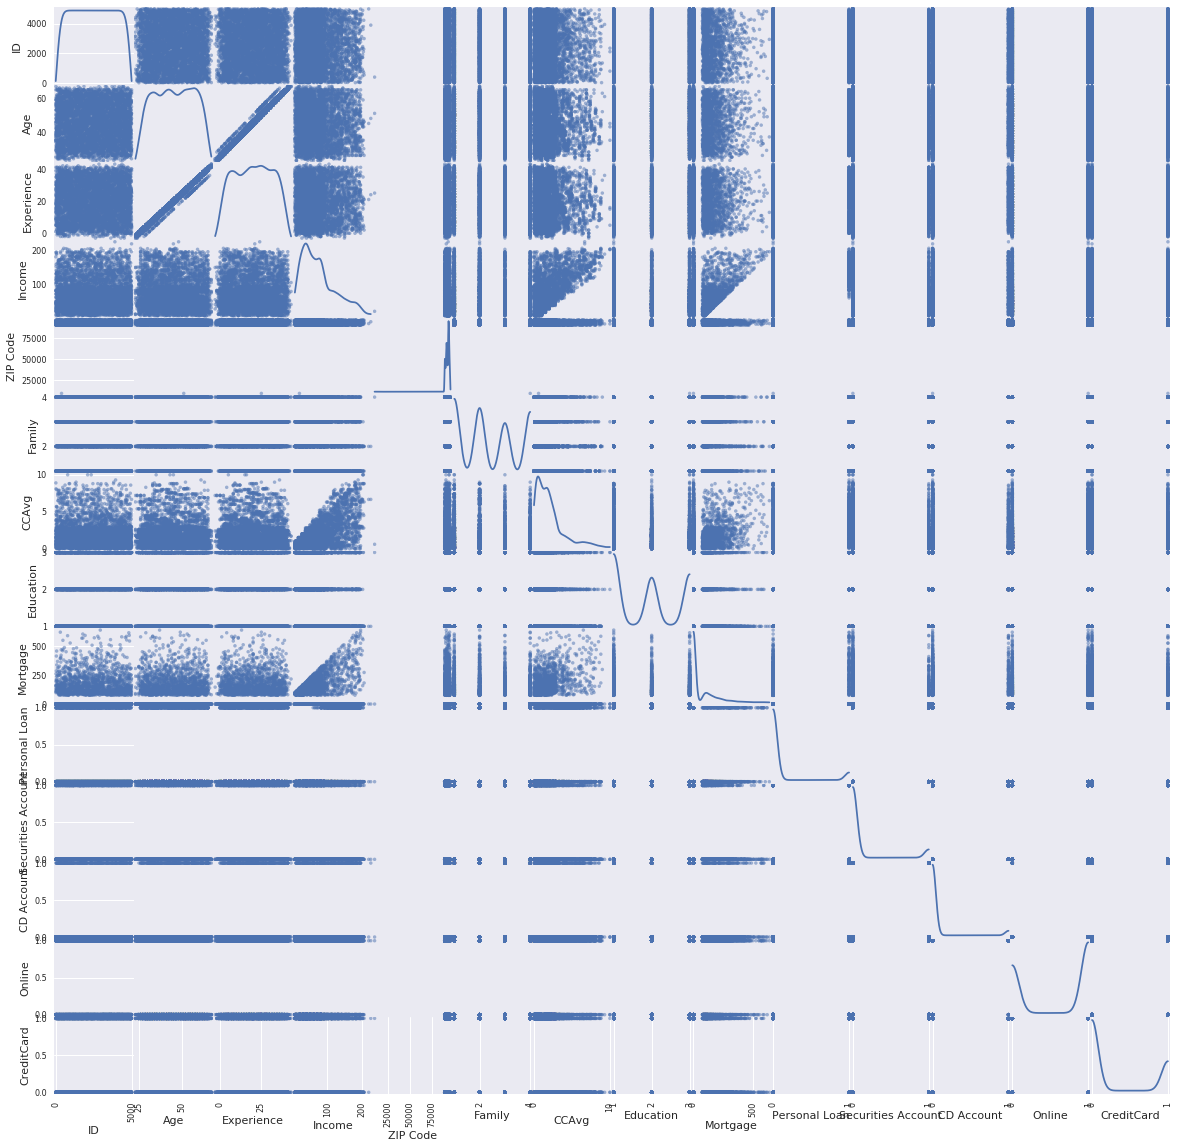

In [66]:
#G. Scatter plot matrix
from pandas.tools.plotting import scatter_matrix
#from pandas.tools.plotting import pandas.plotting.scatter_matrix

scatter_matrix(loan_df,figsize=(20,20),diagonal='kde')
pyplot.show()


In [48]:
#H.Split the loan_df into training and test set in the ratio of 70:30 (Training:Test)
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = loan_df.values
X = array[:,0:14] # select all rows and first 14 columns which are the attributes
Y = array[:,7]   # select all rows and the 7th column which is the classification for CCAvg
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [49]:
#I Create the model using “entropy” method
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.80,1:.20}, max_depth = 9, min_samples_leaf=5 )
 
print dt_model

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, criterion='entropy',
            max_depth=9, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [51]:
#J Evaluate loan_df dataframe using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = loan_df.values
X = array[:,0:14]
Y = array[:,7]
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%") % (result*100.0)

Accuracy: 69.667%


In [54]:
#K Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = loan_df.values
X = array[:,0:14]
Y = array[:,7]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)


Accuracy: 71.700% (1.714%)


In [55]:
#L Random Forest Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

array = loan_df.values
X = array[:,0:14]
Y = array[:,7]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


In [56]:
#M Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.696666666667
[[598   0   0]
 [223  87 130]
 [ 16  86 360]]


In [59]:
#N To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
#X_train

array([[  7.18000000e+02,   5.90000000e+01,   3.40000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  2.49700000e+03,   6.30000000e+01,   3.70000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.47000000e+03,   4.30000000e+01,   1.80000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       ..., 
       [  5.38000000e+02,   4.40000000e+01,   2.00000000e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.22100000e+03,   4.10000000e+01,   1.70000000e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  4.27200000e+03,   2.50000000e+01,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [60]:
#O Fit the model on 30%
model = LogisticRegression()

model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# Note : first argument is true values, second argument is predicted values
# produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

1.0
[[598   0   0]
 [  0 440   0]
 [  0   0 462]]
